# Performance comparison of inference on toy GRN data

Notebook compares metrics for velocity, latent time and GRN inference across different methods applied to toy GRN data.

## Library imports

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

import matplotlib.pyplot as plt
import mplscience
import seaborn as sns

from rgv_tools import DATA_DIR, FIG_DIR
from rgv_tools.core import METHOD_PALETTE
from rgv_tools.plotting._significance import add_significance, get_significance

## General settings

In [2]:
SAVE_FIGURES = False
if SAVE_FIGURES:
    (FIG_DIR / "toy_grn").mkdir(parents=True, exist_ok=True)

FIGURE_FORMATE = "svg"

## Constants

In [3]:
VELOCITY_METHODS = ["regvelo", "velovi", "scvelo"]
TIME_METHODS = ["regvelo", "velovi", "scvelo", "dpt"]
GRN_METHODS = ["regvelo", "correlation", "grnboost2", "celloracle"]

## Data loading

In [5]:
correlation_df = []

for method in VELOCITY_METHODS:
    df = pd.read_parquet(DATA_DIR / "toy_grn" / "results" / f"{method}_correlation.parquet")
    df.columns = f"{method}_" + df.columns
    correlation_df.append(df)
del df

for method in TIME_METHODS:
    if method in VELOCITY_METHODS:
        continue
    df = pd.read_parquet(DATA_DIR / "toy_grn" / "results" / f"{method}_correlation.parquet")
    df.columns = f"{method}_" + df.columns
    correlation_df.append(df)

for method in GRN_METHODS:
    if method in VELOCITY_METHODS + TIME_METHODS:
        continue
    df = pd.read_parquet(DATA_DIR / "toy_grn" / "results" / f"{method}_correlation.parquet")
    df.columns = f"{method}_" + df.columns
    correlation_df.append(df)

correlation_df = pd.concat(correlation_df, axis=1)
correlation_df.head()

,regvelo_velocity,regvelo_time,regvelo_grn,velovi_velocity,velovi_time,scvelo_velocity,scvelo_time,dpt_time,correlation_grn,grnboost2_grn,celloracle_grn
0,0.555112,0.564590,0.530,0.523382,-0.462360,0.461017,0.466543,-0.081997,0.59,0.475,0.470
1,0.747088,0.861632,0.725,0.565394,0.810599,0.621778,0.779928,-0.008727,0.56,0.530,0.555
2,0.747022,0.786513,0.550,0.719559,0.613784,0.710150,0.833685,0.012410,0.71,0.565,0.520
3,0.795365,0.604589,0.530,0.706493,0.125379,0.765667,0.678434,0.824321,0.62,0.620,0.500
4,0.696613,0.914910,0.830,0.680337,0.199152,0.646673,0.718848,-0.102730,0.69,0.550,0.595


## Analysis

### Velocity

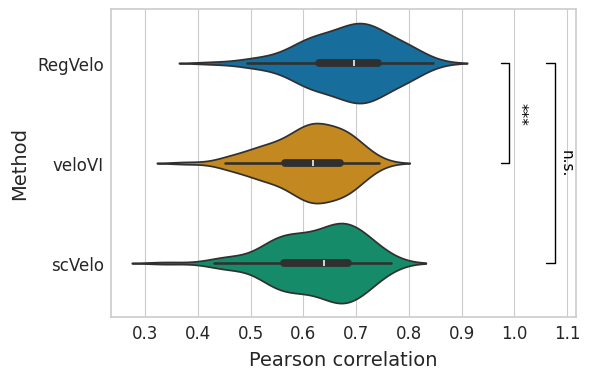

In [ ]:
df = correlation_df.loc[:, correlation_df.columns.str.contains("velocity")]
df.columns = df.columns.str.removesuffix("_velocity")
df = pd.melt(df, var_name="method", value_name="correlation")

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(
        data=df, x="correlation", y="method", hue="method", order=VELOCITY_METHODS, palette=METHOD_PALETTE, ax=ax
    )

    ttest_res = ttest_ind(
        correlation_df["regvelo_velocity"],
        correlation_df["velovi_velocity"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(pvalue=ttest_res.pvalue)
    add_significance(
        ax=ax,
        left=0,
        right=1,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
        orientation="vertical",
    )

    ttest_res = ttest_ind(
        correlation_df["regvelo_velocity"],
        correlation_df["scvelo_velocity"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(pvalue=ttest_res.pvalue)
    add_significance(
        ax=ax,
        left=0,
        right=2,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
        orientation="vertical",
    )

    ax.set(
        xlabel="Pearson correlation",
        ylabel="Method",
        yticks=ax.get_yticks(),
        yticklabels=["RegVelo", "veloVI", "scVelo"],
    )

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / "toy_GRN" / "velocity_benchmark.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    plt.show()

### Latent time

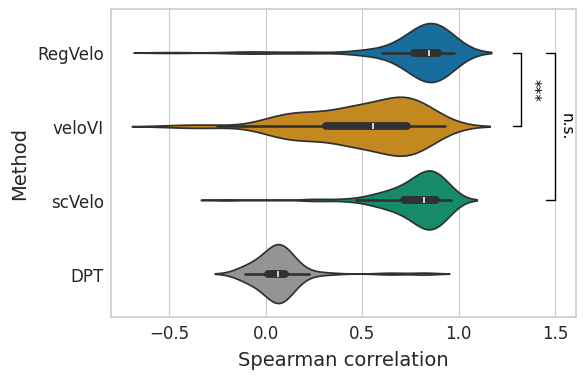

In [7]:
df = correlation_df.loc[:, correlation_df.columns.str.contains("time")]
df.columns = df.columns.str.removesuffix("_time")
df = pd.melt(df, var_name="method", value_name="correlation")

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(
        data=df, x="correlation", y="method", hue="method", order=TIME_METHODS, palette=METHOD_PALETTE, ax=ax
    )

    ttest_res = ttest_ind(
        correlation_df["regvelo_time"],
        correlation_df["velovi_time"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(pvalue=ttest_res.pvalue)
    add_significance(
        ax=ax,
        left=0,
        right=1,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
        orientation="vertical",
    )

    ttest_res = ttest_ind(
        correlation_df["velovi_time"],
        correlation_df["scvelo_time"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(pvalue=ttest_res.pvalue)
    add_significance(
        ax=ax,
        left=0,
        right=2,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
        orientation="vertical",
    )

    ax.set(
        xlabel="Spearman correlation",
        ylabel="Method",
        yticks=ax.get_yticks(),
        yticklabels=["RegVelo", "veloVI", "scVelo", "DPT"],
    )

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / "toy_GRN" / "time_benchmark.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    plt.show()

### GRN

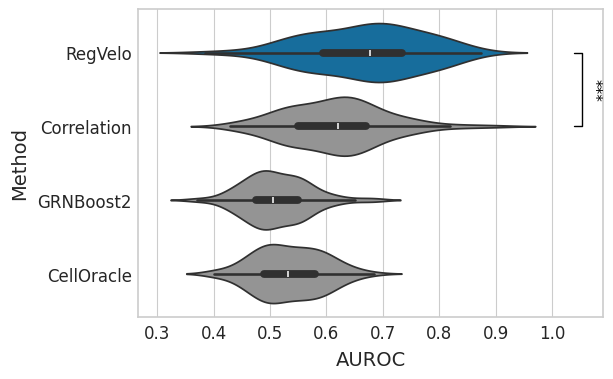

In [8]:
df = correlation_df.loc[:, correlation_df.columns.str.contains("grn")]
df.columns = df.columns.str.removesuffix("_grn")
df = pd.melt(df, var_name="method").rename(columns={"value": "correlation"})

with mplscience.style_context():
    sns.set_style(style="whitegrid")
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.violinplot(data=df, x="correlation", y="method", hue="method", order=GRN_METHODS, palette=METHOD_PALETTE, ax=ax)

    ttest_res = ttest_ind(
        correlation_df["regvelo_grn"],
        correlation_df["correlation_grn"],
        equal_var=False,
        alternative="greater",
    )
    significance = get_significance(pvalue=ttest_res.pvalue)
    add_significance(
        ax=ax,
        left=0,
        right=1,
        significance=significance,
        lw=1,
        bracket_level=1.05,
        c="k",
        level=0,
        orientation="vertical",
    )

    ax.set(
        xlabel="AUROC",
        ylabel="Method",
        yticks=ax.get_yticks(),
        yticklabels=["RegVelo", "Correlation", "GRNBoost2", "CellOracle"],
    )

    if SAVE_FIGURES:
        fig.savefig(
            FIG_DIR / "toy_GRN" / "grn_benchmark.svg",
            format="svg",
            transparent=True,
            bbox_inches="tight",
        )

    plt.show()